# Expected Threat Derivation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import ast
import warnings
import seaborn as sns
from mplsoccer import Pitch,VerticalPitch
warnings.filterwarnings("ignore")

In [2]:
with open('Transition_matrix.npy', 'rb') as f:
    Transition_matrix = np.load(f)

In [3]:
with open('shot_matrix.npy', 'rb') as f:
    shot_matrix = np.load(f)

In [4]:
with open('move_matrix.npy', 'rb') as f:
    move_matrix = np.load(f)

In [5]:
with open('goal_matrix.npy', 'rb') as f:
    goal_matrix = np.load(f)

In [6]:
xT = np.zeros(len(move_matrix))
iterations = 5
for k in range(iterations):
    xTtemp = xT
    for i in range(len(xT)):
        pass_payoff = 0
        for j in range(len(xT)):
            pass_payoff += Transition_matrix[i,j]*xT[j]
        xTtemp[i] = move_matrix[i]*pass_payoff + shot_matrix[i]*goal_matrix[i]
    xT = xTtemp
    

In [71]:
xTfinal = xT.reshape((20,15))

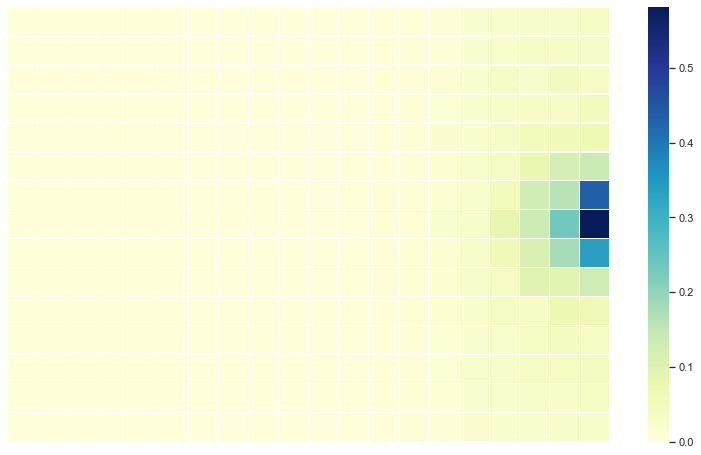

In [173]:
max = np.amax(xTfinal)
fig ,ax = plt.subplots(figsize=(13.5,8))
sns.heatmap(xTfinal.T , vmin=0, vmax=max, cmap="YlGnBu", linewidths=0.25, xticklabels=False,yticklabels=False)

The darker is the shade, higher is the threat of an action that takes place in that zone

In [11]:
xTfinal = np.around(xTfinal, decimals=4)

In [12]:
with open('xT_matrix.npy', 'wb') as f:
     np.save(f,xTfinal)

In [13]:
spainevents = pd.read_csv('spain_events.csv')
pass_events = spainevents.loc[spainevents['eventId']==8]

In [14]:
zone1 = pass_events['zone1'].astype(int)
zone2 = pass_events['zone2'].astype(int)
zone1=np.array(zone1)
zone2=np.array(zone2)

In [15]:
pd.set_option('display.max_columns', None)
pass_events


,id,eventId,playerId,matchId,teamId,subEventId,matchPeriod,eventSec,x_coord1,y_coord1,x_coord2,y_coord2,zone1,zone2,is_goal,is_owngoal,is_counterattack,is_direct,is_indirect,is_blocked,is_interception,is_clearance,is_slidingtackle,is_accurate,is_inaccurate,is_through
0,180864419,8,3542,2565548,682,85.0,1H,0.05,38.85,41.48,52.50,34.00,114.0,157.0,0,0,0,0,0,0,0,0,0,1,0,0
1,180864418,8,274435,2565548,682,85.0,1H,0.05,52.50,34.00,47.25,20.40,157.0,139.0,0,0,0,0,0,0,0,0,0,1,0,0
2,180864420,8,364860,2565548,682,85.0,1H,0.11,47.25,20.40,39.90,8.16,139.0,106.0,0,0,0,0,0,0,0,0,0,1,0,0
3,180864421,8,3534,2565548,682,85.0,1H,0.15,39.90,8.16,33.60,46.92,106.0,100.0,0,0,0,0,0,0,0,0,0,1,0,0
4,180864422,8,3695,2565548,682,85.0,1H,0.23,33.60,46.92,32.55,25.16,100.0,95.0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628650,253302662,8,3486,2565927,682,81.0,2H,48.76,8.40,19.72,14.70,12.92,19.0,32.0,0,0,0,0,0,0,0,0,0,1,0,0
628652,253302665,8,3695,2565927,682,85.0,2H,48.86,37.80,23.12,47.25,35.36,110.0,142.0,0,0,0,0,0,0,0,0,0,1,0,0
628654,253302671,8,20623,2565927,682,85.0,2H,48.98,69.30,17.00,92.40,1.36,198.0,255.0,0,0,0,0,0,0,0,0,0,1,0,0
628656,253302674,8,122832,2565927,682,80.0,2H,49.03,101.85,14.28,96.60,17.68,288.0,273.0,0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
xTzone1 = np.zeros(len(pass_events))
xTzone2 = np.zeros(len(pass_events))

In [17]:
xTfinal = xTfinal.flatten()

In [18]:
for i in range(len(pass_events)):
    temp1 = zone1[i]
    temp2 = zone2[i]
    xTzone1[i] = xTfinal[temp1]
    xTzone2[i] = xTfinal[temp2]

In [19]:
xTzone1

array([0.0008, 0.0023, 0.0018, ..., 0.0101, 0.0541, 0.0002])

In [20]:
xTzone2

array([0.0023, 0.0018, 0.0006, ..., 0.0289, 0.0384, 0.0004])

In [21]:
xTdifference = xTzone2-xTzone1

In [22]:
xTdifference

array([ 0.0015, -0.0005, -0.0012, ...,  0.0188, -0.0157,  0.0002])

In [23]:
pass_events['xTzone1']=xTzone1
pass_events['xTzone2']=xTzone2
pass_events['xTdifference']=xTdifference

In [176]:
pass_events

,id,eventId,playerId,matchId,teamId,subEventId,matchPeriod,eventSec,x_coord1,y_coord1,x_coord2,y_coord2,zone1,zone2,is_goal,is_owngoal,is_counterattack,is_direct,is_indirect,is_blocked,is_interception,is_clearance,is_slidingtackle,is_accurate,is_inaccurate,is_through,xTzone1,xTzone2,xTdifference
0,180864419,8,3542,2565548,682,85.0,1H,0.05,38.85,41.48,52.50,34.00,114.0,157.0,0,0,0,0,0,0,0,0,0,1,0,0,0.0008,0.0023,0.0015
1,180864418,8,274435,2565548,682,85.0,1H,0.05,52.50,34.00,47.25,20.40,157.0,139.0,0,0,0,0,0,0,0,0,0,1,0,0,0.0023,0.0018,-0.0005
2,180864420,8,364860,2565548,682,85.0,1H,0.11,47.25,20.40,39.90,8.16,139.0,106.0,0,0,0,0,0,0,0,0,0,1,0,0,0.0018,0.0006,-0.0012
3,180864421,8,3534,2565548,682,85.0,1H,0.15,39.90,8.16,33.60,46.92,106.0,100.0,0,0,0,0,0,0,0,0,0,1,0,0,0.0006,0.0005,-0.0001
4,180864422,8,3695,2565548,682,85.0,1H,0.23,33.60,46.92,32.55,25.16,100.0,95.0,0,0,0,0,0,0,0,0,0,1,0,0,0.0005,0.0003,-0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318717,253302662,8,3486,2565927,682,81.0,2H,93.76,8.40,19.72,14.70,12.92,19.0,32.0,0,0,0,0,0,0,0,0,0,1,0,0,0.0002,0.0002,0.0000
318718,253302665,8,3695,2565927,682,85.0,2H,93.86,37.80,23.12,47.25,35.36,110.0,142.0,0,0,0,0,0,0,0,0,0,1,0,0,0.0007,0.0020,0.0013
318719,253302671,8,20623,2565927,682,85.0,2H,93.98,69.30,17.00,92.40,1.36,198.0,255.0,0,0,0,0,0,0,0,0,0,1,0,0,0.0101,0.0289,0.0188
318720,253302674,8,122832,2565927,682,80.0,2H,94.03,101.85,14.28,96.60,17.68,288.0,273.0,0,0,0,0,0,0,0,0,0,0,1,0,0.0541,0.0384,-0.0157


In [25]:
playerId=np.unique(pass_events['playerId'])

In [26]:
expected_threat=np.zeros(len(playerId))
passes = np.zeros(len(playerId))
accurate_passes = np.zeros(len(playerId))
j = 0
for id in playerId:
    temp1=pass_events.loc[(pass_events['playerId']==id)&(pass_events['is_accurate']==1),'xTdifference'].sum()
    temp2=pass_events.loc[pass_events['playerId']==id].shape[0]
    temp3=pass_events.loc[(pass_events['playerId']==id)&(pass_events['is_accurate']==1),'is_accurate'].sum()
    expected_threat[j]=temp1
    passes[j] = temp2
    accurate_passes[j] = temp3
    j = j + 1
    

In [27]:
expected_threat = np.around(expected_threat, decimals=4)

In [28]:
pass_accuracy = np.divide(accurate_passes, passes)

In [29]:
pass_accuracy = np.around(pass_accuracy, decimals=4)*100

In [30]:
matrix=[[playerId,passes,accurate_passes,pass_accuracy, expected_threat]]
matrix=np.transpose(matrix)
matrix=np.reshape(matrix,(np.shape(matrix)[0],np.shape(matrix)[1]))

In [31]:
creators = pd.DataFrame(matrix, columns=['playerId','Passes','Accurate Passes','Pass Accuracy','Expected Threat'])

In [32]:
creators['playerId']=creators['playerId'].astype(int)
creators['Passes']=creators['Passes'].astype(int)
creators['Accurate Passes']=creators['Accurate Passes'].astype(int)

In [33]:
creators

,playerId,Passes,Accurate Passes,Pass Accuracy,Expected Threat
0,0,9,4,44.44,0.0037
1,33,19,14,73.68,-0.0001
2,99,13,12,92.31,0.0156
3,151,360,266,73.89,1.8868
4,254,1475,1132,76.75,9.2017
...,...,...,...,...,...
552,519496,41,40,97.56,0.1238
553,520163,14,10,71.43,0.0648
554,545811,7,7,100.00,-0.0199
555,551398,10,7,70.00,0.0234


In [34]:
players=pd.read_json(r'C:\Users\ATHARAVA SHUKLA\Desktop\study\Football\wyscout data 17-18\players.json')

In [35]:
birthDate=players.birthDate
birthdates=np.zeros(len(players))
for i in range(len(birthDate)):
    temp=birthDate[i][0:4]
    temp=int(temp)
    temp = 2018-temp
    birthdates[i] = temp
players['age']=birthdates

In [36]:
name=[]
age=[]
for id in playerId:
    temp1=players.loc[players['wyId']==id]['shortName'].values
    temp2=players.loc[players['wyId']==id].age
    name =np.append(name,temp1)
    age = np.append(age,temp2)

In [37]:
creators=creators.drop(0)

In [38]:
creators['Name']=name
creators['Age']=age

## Top creators in La-Liga 2017-2018


In [181]:
creators = creators.sort_values('Expected Threat',
                                     ascending=False)
creators

,playerId,Passes,Accurate Passes,Pass Accuracy,Expected Threat,Name,Age
0,3310,1704,1381,81.04,15.3242,Marcelo,30.0
1,3359,1787,1468,82.15,13.5836,L. Messi,31.0
2,278289,1431,1217,85.05,10.2909,Odriozola,23.0
3,3325,1517,1144,75.41,10.1758,Juanfran,30.0
4,3280,2038,1767,86.70,9.9172,\u00c9. Banega,30.0
...,...,...,...,...,...,...,...
551,278324,31,26,83.87,-0.1128,Carlos Fern\u00e1ndez,22.0
552,225946,141,111,78.72,-0.1506,A. Sanabria,22.0
553,352328,23,15,65.22,-0.1534,E. Demirovi\u0107,20.0
554,344120,113,98,86.73,-0.3035,Borja Mayoral,21.0


In [42]:
creators.to_csv('xTcreators.csv', index=False)

In [40]:
creators=creators.round({'Pass Accuracy':2})

In [73]:
passers = creators.loc[creators['Passes']>1000]

In [74]:
passers = passers.sort_values('Pass Accuracy', ascending = False)

In [75]:
passers

,playerId,Passes,Accurate Passes,Pass Accuracy,Expected Threat,Name,Age
226,70120,1579,1487,94.17,1.8765,Javi Garc\u00eda,31.0
7,14723,1958,1834,93.67,9.4825,T. Kroos,28.0
122,26307,2020,1889,93.51,3.3662,A. Mandi,27.0
129,25397,1539,1437,93.37,3.1883,S. Umtiti,25.0
203,3788,1498,1382,92.26,2.1348,Jordi Amat,26.0
...,...,...,...,...,...,...,...
126,43051,1025,770,75.12,3.2426,Gabriel,25.0
76,5400,1087,809,74.43,4.8533,Gerard Moreno,26.0
25,3974,1123,824,73.37,7.4661,D. Su\u00e1rez,30.0
34,4094,1134,825,72.75,6.8438,Ander Capa,26.0


Players with the highest passing accuracy (must have completed 1000 passes)

In [46]:
Barcelona_events=pass_events.loc[pass_events['teamId']==676]

In [101]:
barca_match=Barcelona_events.loc[Barcelona_events['matchId']==2565711]
player_passes = barca_match.loc[barca_sociedad['playerId']==3359]
index = np.arange(0,len(player_passes),1)
player_passes.index=index

In [51]:
matches_Spain=pd.read_json(r'C:\Users\ATHARAVA SHUKLA\Desktop\study\Football\wyscout data 17-18\matches_Spain.json')


# PASS MAP

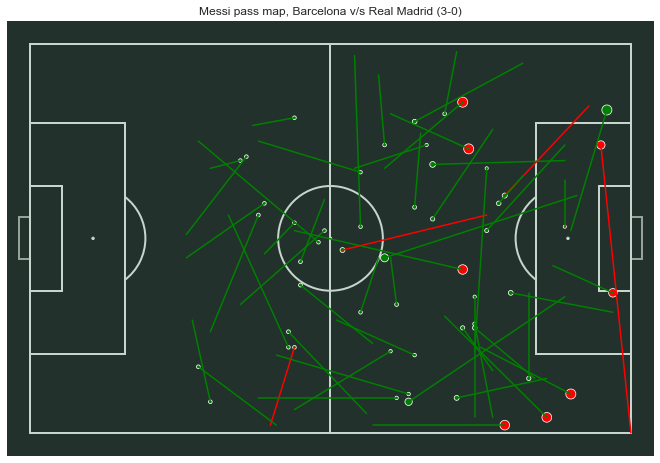

In [175]:
fig ,ax = plt.subplots(figsize=(13.5,8))
pitch = Pitch(pitch_type='custom',half=False, goal_type='box', pitch_color='#22312b', line_color='#c7d5cc', linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)
pitch.draw(ax=ax)
for i in range(len(player_passes)):
    if player_passes['is_accurate'][i]==1:
        plt.plot([player_passes['x_coord1'][i],player_passes['x_coord2'][i]],[player_passes['y_coord1'][i],player_passes['y_coord2'][i]], color='green')
#         plt.scatter(x=messi_passes['x_coord1'][i],y=messi_passes['y_coord1'][i],color='green')
        
    else:
        plt.plot([player_passes['x_coord1'][i],player_passes['x_coord2'][i]],[player_passes['y_coord1'][i],player_passes['y_coord2'][i]], color='red')
sns.scatterplot(data=player_passes.loc[player_passes['xTdifference']>(-0.01)], x= 'x_coord1' , y = 'y_coord1' , size='xTdifference' , color ='green',sizes=(10,100),legend=False)
sns.scatterplot(data=player_passes.loc[player_passes['xTdifference']<(-0.01)], x='x_coord1', y='y_coord1',size='xTdifference', color='red',sizes=(10,100),legend=False)


plt.title('Messi pass map, Barcelona v/s Real Madrid (3-0)')
plt.gca().invert_yaxis()

Green Lines signify the successful passes whereas red lines show us the unsuccessful passes. Here the points signify the starting point of the pass and size shows us the increase in xT, if the xT decreases negligibly (<0.01) it is also marked in green. The successful passes that lead to a decrease in the expected threat are marked with a red dot at their starting points.


# Running xT

In [143]:
index = np.arange(0,len(pass_events),1)
pass_events.index=index
for i in range(len(pass_events)):
    if pass_events['matchPeriod'][i]=='2H':
        pass_events['eventSec'][i] = pass_events['eventSec'][i]+45

In [145]:
match = pass_events.loc[pass_events['matchId']==2565711]
team1 = match.loc[match['teamId']==676]
team2 = match.loc[match['teamId']==675]

In [146]:
def getrollingxTdata(team_data):
    cum_xT=np.zeros(len(team_data))
    temp = 0
    for i in range(len(team_data)):
        temp= temp + team_data.iloc[i]['xTdifference']
        cum_xT[i]=temp
    time = team_data.eventSec
    time=np.array(time)
    return cum_xT, time

In [149]:
team1_cumxT, team1_time = getrollingxTdata(team1)
team2_cumxT, team2_time = getrollingxTdata(team2)

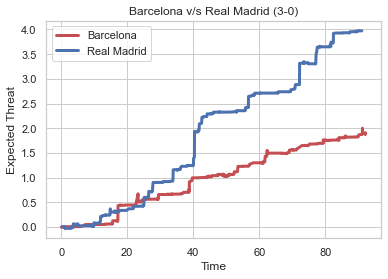

In [169]:
sns.set(style='whitegrid')
sns.lineplot(team1_time,team1_cumxT, color='r', linewidth=3, label='Barcelona')
sns.lineplot(team2_time,team2_cumxT, color='b',linewidth=3, label='Real Madrid' )
plt.ylabel('Expected Threat')
plt.xlabel('Time')
plt.title('Barcelona v/s Real Madrid (3-0)')
plt.legend(loc='upper left')